In [1]:
from src.model.shap.analyze_shap_results import analyze_shap_results
from src.model.shap.run_shap import run_shap

shap_explanations = run_shap(
    dataset_name="demographic+digital",
    target_col="group",
    task="classification",
    model_name_to_explain="SVC",
    timestamp="2025-09-12_1559"
)

/home/gianluca/Research/tmt-analysis/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers._permutation.PermutationExplainer | link: CPUDispatcher
[SHAP] backend: shap.explainers.

In [2]:
shap_explanations[0].values.shape

(1, 20, 2)

In [3]:
from src.model.shap.analyze_shap_results import analyze_shap_results
shap_df = analyze_shap_results(explanations=shap_explanations)
shap_df

,mean_abs_shap_cond,freq_selection
is_valid_sum_A,0.067246,0.094595
max_duration_B_A_ratio,0.043420,0.027027
non_cut_correct_targets_touches_PART_B,0.041541,1.000000
is_valid_sum_B,0.039169,1.000000
total_hesitations_PART_A,0.034948,0.013514
non_cut_correct_targets_touches_B_A_ratio,0.032492,1.000000
state_transitions_PART_A,0.029255,0.027027
travel_time_PART_B,0.029073,0.013514
travel_distance_B_A_ratio,0.028157,0.054054
average_duration_PART_A,0.022582,0.027027


In [4]:
import matplotlib.pyplot as plt

def plot_shap_summary(df, top_n=20):
    """
    Plotea el DataFrame resultante de shap_mean_conditional.

    Args:
        df: DataFrame con columnas ['mean_abs_shap_cond', 'freq_selection'].
        top_n: cuántos features mostrar (ordenados por mean_abs_shap_cond).
    """
    # Ordenar y limitar al top_n
    df_plot = df.sort_values("mean_abs_shap_cond", ascending=False).head(top_n)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Eje 1: barras de |SHAP| medio condicional
    ax1.bar(df_plot.index, df_plot["mean_abs_shap_cond"], color="steelblue", alpha=0.7)
    ax1.set_ylabel("Mean |SHAP| (condicional)", color="steelblue")
    ax1.tick_params(axis="y", labelcolor="steelblue")
    ax1.set_xticklabels(df_plot.index, rotation=45, ha="right")

    # Eje 2: frecuencia de selección
    ax2 = ax1.twinx()
    ax2.plot(df_plot.index, df_plot["freq_selection"], color="darkorange",
             marker="o", linestyle="-", linewidth=2)
    ax2.set_ylabel("Frecuencia de selección", color="darkorange")
    ax2.tick_params(axis="y", labelcolor="darkorange")
    ax2.set_ylim(0, 1)  # frecuencia en [0,1]

    plt.title("Importancia media de SHAP (clase positiva) y frecuencia de selección")
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_176145/2882379529.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_plot.index, rotation=45, ha="right")


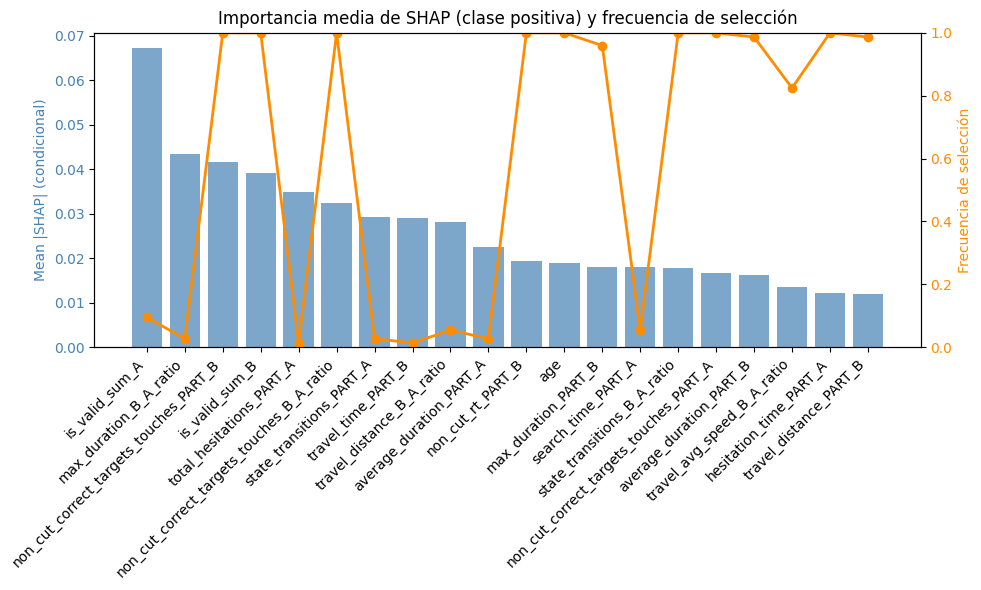

In [5]:
plot_shap_summary(shap_df)